In [1]:
#project_1
#1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
#2

missing_values=df.isnull().sum()
missing_values
null_features=missing_values[missing_values>0].index.tolist()
null_features


['Age', 'Cabin', 'Embarked']

In [3]:
#3
df[df["Age"].isnull()].head()
df["Age"]=df["Age"].fillna(df["Age"].mean())
df[df["Age"]==df["Age"].mean()].head(5)


#cabin column with unknown
df[df["Cabin"].isnull()]
df["Cabin"]=df["Cabin"].fillna("Unknown")
df[df["Cabin"]=="Unknown"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Unknown,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,Unknown,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,Unknown,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S


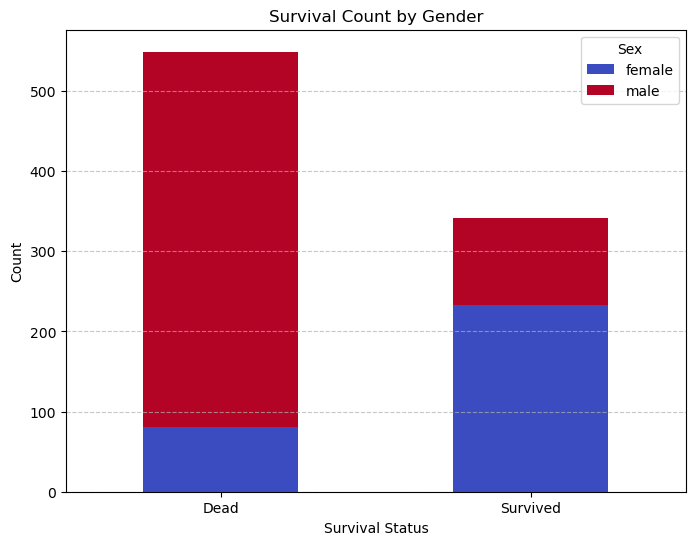

In [4]:
#4
gender_survival=df.groupby(["Survived","Sex"]).size().unstack()
gender_survival

gender_survival.index = gender_survival.index.map({0: 'Dead', 1: 'Survived'})
gender_survival
#df[(df["Survived"]==0)]["Sex"].value_counts()
gender_survival.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="coolwarm")
plt.title("Survival Count by Gender")
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Sex")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


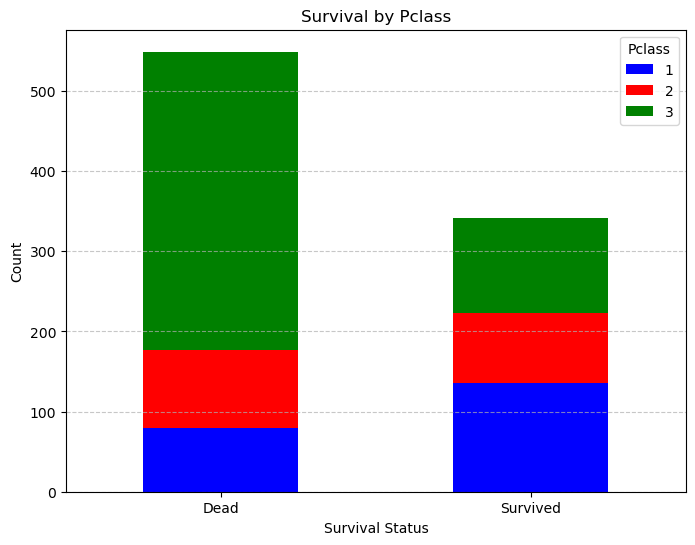

In [5]:
#5
Pclass_survival=df.groupby(["Survived","Pclass"]).size().unstack()
Pclass_survival.index=Pclass_survival.index.map({0:"Dead",1:"Survived"})

Pclass_survival.plot(kind="bar",stacked=True,figsize=(8,6),color=["blue","red","green"])
plt.title("Survival by Pclass")
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Pclass")
plt.grid(axis="y",ls="--",alpha=0.7)
plt.show()


In [6]:
#6

def age_category(age):
  if age <=16:
    return 0
  elif age <=26:
    return 1
  elif age <=36:
    return 2
  elif age <=62:
    return 3
  else:
    return 4
df["AgeClass"]=df["Age"].apply(age_category)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1


In [7]:
#7
df=df.drop("Age",axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,Unknown,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,Unknown,S,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,Unknown,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,1


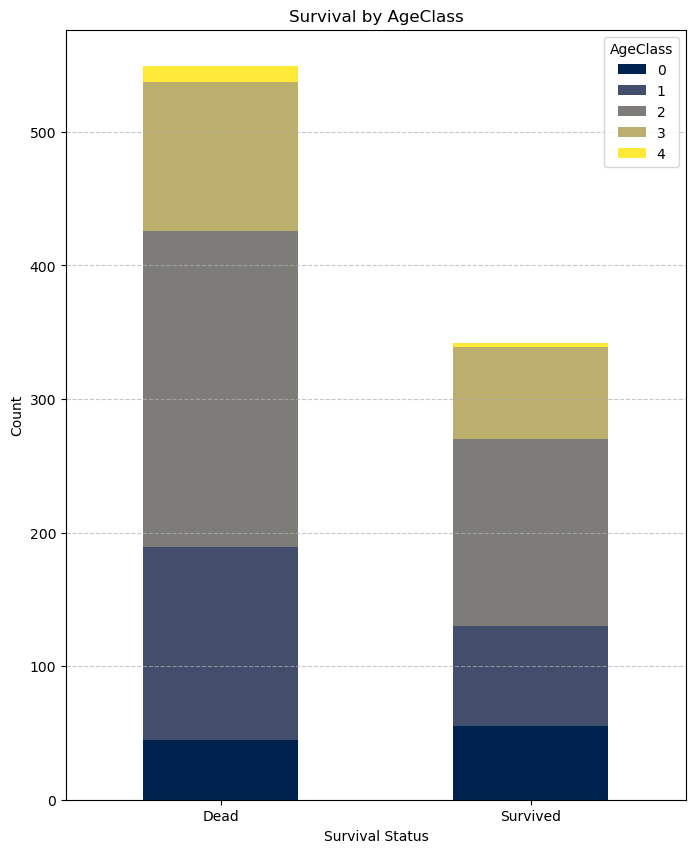

In [8]:
#8
AgeClass_survival=df.groupby(["Survived","AgeClass"]).size().unstack()
AgeClass_survival.index=AgeClass_survival.index.map({0:"Dead",1:"Survived"})

AgeClass_survival.plot(kind="bar",stacked=True,figsize=(8,10),colormap="cividis")
plt.title("Survival by AgeClass")
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="AgeClass")
plt.grid(axis="y",ls="--",alpha=0.7)
plt.show()